# Install and Import Required Libraries

## Install Libraries

## Import Required Libraries

In [1]:
# data processing 
import pandas as pd
import numpy as np


# machine learning process
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import winsorize

import pickle

%matplotlib inline

# Defining Functions

## Functions to return attributes and target

In [2]:
def split_attributes_target(data_df,target_name):
    X = data_df.drop(target_name,axis=1)
    y = data_df[target_name]
    return X,y

# Data Description

## Dataset yang digunakan
***
Data yang digunakan adalah **Pima Indian Diabetes Database**

# Exploratory Data Analysis

## Data Loading

In [3]:
diabetic_df = pd.read_csv('dataset/diabetes.csv')

## Data Dimension

In [4]:
diabetic_df.shape

(768, 9)

## Show top 5 data

In [5]:
diabetic_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Show data information

In [6]:
diabetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# check number of missing values
diabetic_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**ANALISIS** <br>
1. Dari dataset dikatakan tidak ada *missing values*. Cukup aneh. Hal ini akan diperiksa lebih lanjut apakah ada *invalid values* pada dataset
2. Semua atribut bertipe numerik
3. Kelas target bertipe kategorikal (ordinal)

## Check duplicated data

In [8]:
diabetic_df[diabetic_df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


- Tidak ada data duplikat

## Features Importance using ANOVA F-Score
***
Karena atribut bertipe numerikal dan target bertipe categorical, maka ANOVA F-score digunakan untuk menghitung kepentingan atribut pada kelas target

### Splitting Attributes and Target

In [9]:
attributes,target = split_attributes_target(diabetic_df,'Outcome')

In [10]:
# instansiasi objek
anova_fs = SelectKBest(score_func=f_classif, k='all')

# anova fit into data
anova_fs = anova_fs.fit(attributes,target)

# anova attributes scores
anova_series = pd.Series(data=anova_fs.scores_, index=anova_fs.feature_names_in_)

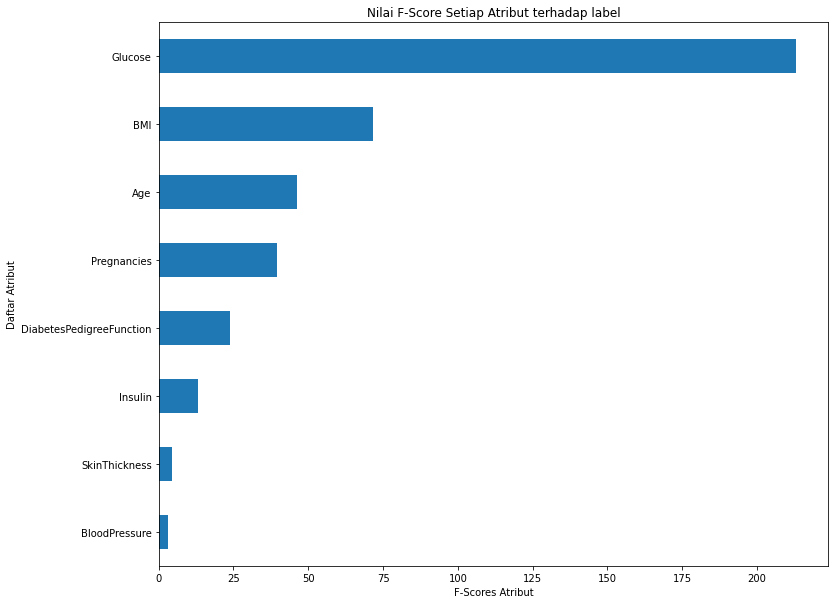

In [11]:
plt.figure(figsize=(12,10))
anova_series.sort_values().plot(kind='barh')
plt.ylabel('Daftar Atribut')
plt.xlabel('F-Scores Atribut')
plt.title('Nilai F-Score Setiap Atribut terhadap label')
plt.show()

**ANALISIS** <br>
1. Atribut **Glucose, BMI, dan Age** menjadi tiga atribut yang paling penting untuk menentukan label kelas **Outcome**

## Statistics Descriptive within data

In [12]:
diabetic_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**ANALISIS** <br>
1. Ada beberapa atribut yang mengandung nilai **0**. Nilai ini tidak masuk akal, seperti BloodPressure=0 (apakah pasien sudah meninggal?)
2. Nilai **0** pada atribut-atribut tersebut akan dianggap sebagai *invalid values* dan dianggap sebagai **missing values**. Beberapa atribut yang mengandung nilai invalid adalah: <br>
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
3. Akan dilakukan penanganan *missing values* dengan cara imputasi dengan median

## Mencetak semua nilai unik pada setiapa atribut

In [13]:
for col in diabetic_df.columns.values:
    print("Nilai Unik untuk Atribut ", col.upper())
    print(np.sort(diabetic_df[col].unique()))
    print("="*30)

Nilai Unik untuk Atribut  PREGNANCIES
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17]
Nilai Unik untuk Atribut  GLUCOSE
[  0  44  56  57  61  62  65  67  68  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 186 187 188
 189 190 191 193 194 195 196 197 198 199]
Nilai Unik untuk Atribut  BLOODPRESSURE
[  0  24  30  38  40  44  46  48  50  52  54  55  56  58  60  61  62  64
  65  66  68  70  72  74  75  76  78  80  82  84  85  86  88  90  92  94
  95  96  98 100 102 104 106 108 110 114 122]
Nilai Unik untuk Atribut  SKINTHICKNESS
[ 0  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 2

## Mengetahui jumlah nilai unik setiap atribut

In [14]:
x_labels = diabetic_df.nunique().index
y_labels = diabetic_df.nunique().values

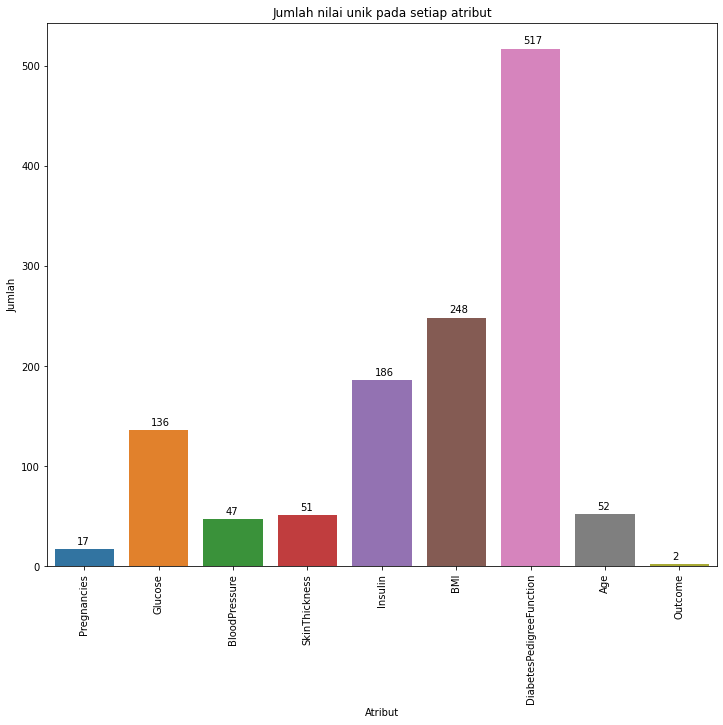

In [15]:
plt.figure(figsize=(12,10))
sns.barplot(x=x_labels,y=y_labels)

# anotation jumlah nilai unik setiap fitur
for i in range(len(x_labels)):
    plt.text(i-0.1,y_labels[i]+5,str(y_labels[i]))

plt.title('Jumlah nilai unik pada setiap atribut')
plt.xlabel('Atribut')
plt.ylabel('Jumlah')
plt.xticks(rotation=90)
plt.show()

## Replacing *0 invalid values* pada beberapa atribut
***
Atribut di bawah ini mengandung nilai **0** yang merupakan invalid values
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

In [16]:
features_contain_invalid_ = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

### Ganti 0 invalid values dengan median dari atribut yang bersangkutan
***
Berhubung semua atribut yang mengandung nilai 0 adalah bertipe numerik, maka imputasinya menggunakan *median*

In [17]:
# ganti 0 pada kolom yang memuat invalid values dengan median
for inv_col in features_contain_invalid_:
    diabetic_df[inv_col].replace({0:diabetic_df[inv_col].median()}, inplace=True)

## Data Visualization

### Data Distribution using Histogram

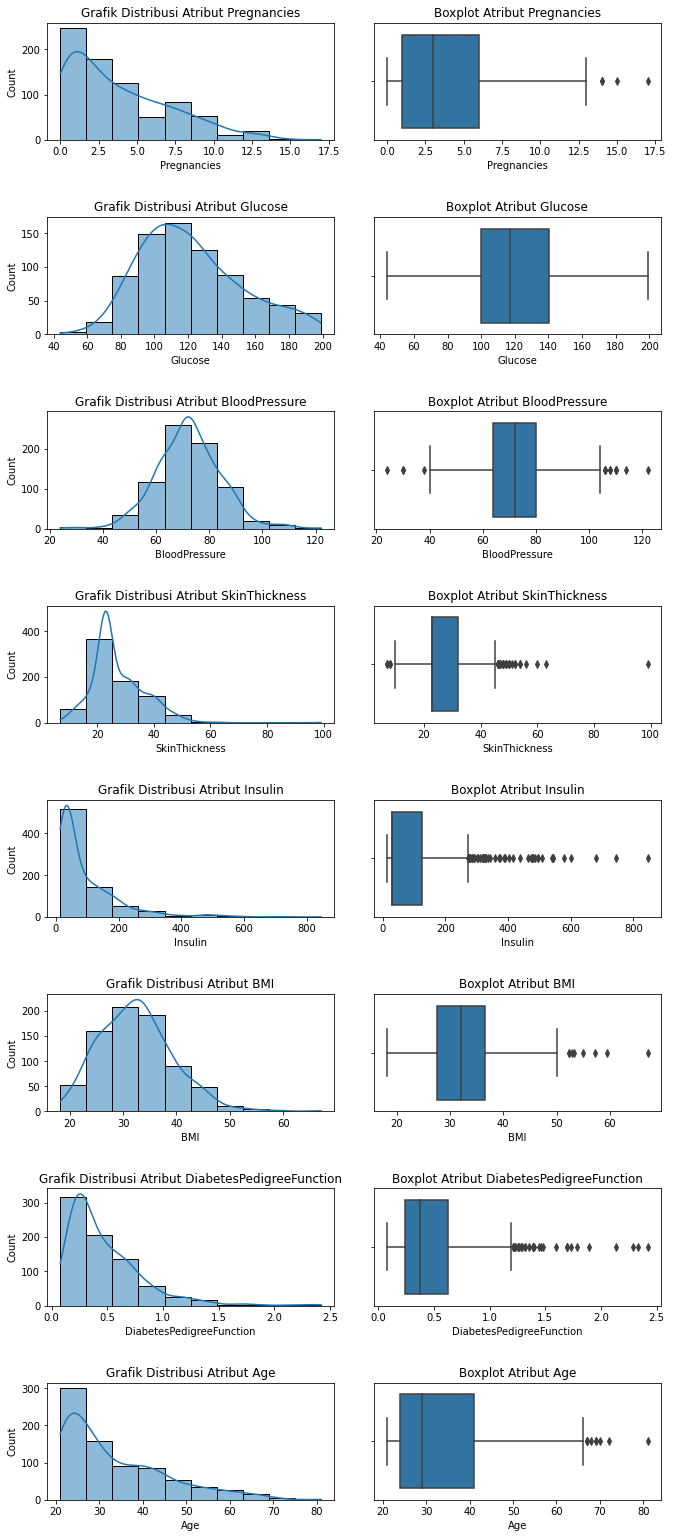

In [18]:
diabetic_attributes_ ,diabetic_target_ = split_attributes_target(diabetic_df,'Outcome')
n_rows = len(diabetic_attributes_.columns.values)
n_cols = 2


fig = plt.figure( figsize=(10,22))
axs= []
plot_number = 1

for col in diabetic_attributes_.columns.values:
    # add histogram 
    axs.append(fig.add_subplot(n_rows,n_cols,plot_number))
    count, bin_edges = np.histogram(diabetic_df[col])
    sns.histplot(diabetic_df[col], bins=bin_edges,ax=axs[plot_number-1], kde=True,)
    axs[plot_number-1].set_title('Grafik Distribusi Atribut '+col)
    plot_number+=1
    
    # add boxplot
    axs.append(fig.add_subplot(n_rows,n_cols,plot_number))
    sns.boxplot(x=diabetic_df[col], ax=axs[plot_number-1])
    axs[plot_number-1].set_title('Boxplot Atribut '+col)
    plot_number+=1

fig.tight_layout(pad=3)

Mayoritas atribut masih mengandung outliers

### Percentage of each class target

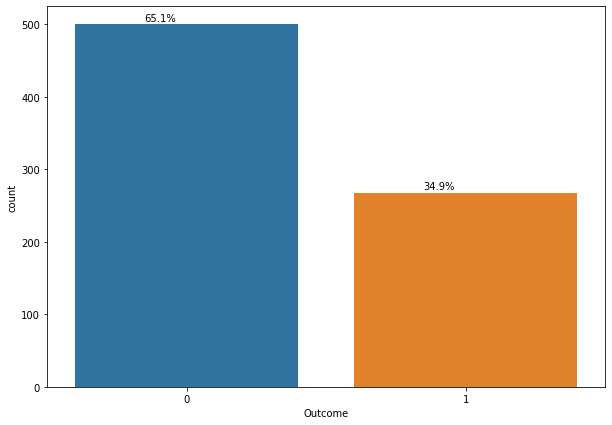

In [19]:
x = diabetic_df['Outcome'].value_counts().index
y = diabetic_df['Outcome'].value_counts().values

plt.figure(figsize=(10,7))
sns.countplot(x=diabetic_df['Outcome'])
for i in range(len(x)):
    plt.text(i-0.15,y[i]+5,str(np.round((y[i]/diabetic_df.shape[0])*100,1)) + "%")

Imbalanced dataset: <br>
1. Kelas 0 **65,1%** 
2. Kelas 1 **34,9%**

Imbalanced hampir 2x lipat ini mungkin berpengaruh ke recall dari model klasifikasi

# Preprocessing

## Siapkan dictionary untuk menampung hasil preprocessing

In [20]:
models = dict()

## Data Loading

In [21]:
diabetic_df = pd.read_csv('dataset/diabetes.csv')

## Splitting Attibutes and Target

In [22]:
X,y = split_attributes_target(diabetic_df,'Outcome')

# numerical atributes
numerical_columns = X.select_dtypes(include=['float64','int64']).columns.values

# feature contain invalid values
features_contain_invalid_ = features_contain_invalid_

# save into models
models['columns']=[
    ('numerical', numerical_columns),
    ('invalid', features_contain_invalid_),
]

## Splitting  data into train and test

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Undersampling Training Data

In [24]:
# menyatukan atribut dan target pada data latih
df = pd.concat([pd.DataFrame(data=X_train.reset_index(drop=True)),y_train.reset_index(drop=True)],axis=1)

In [25]:
# melihat banyak setiap nilai pada label kelas
df['Outcome'].value_counts()

0    350
1    187
Name: Outcome, dtype: int64

In [26]:
# under-sampling kelas 'No' agar jumlahnya sama dengan kelas 'Yes' sebesar n_sampel
no_df = df[df['Outcome']==0].sample(frac=1, random_state=42)[:df['Outcome'].value_counts()[1]]
yes_df = df[df['Outcome']==1].sample(frac=1, random_state=42)

# concat data berlabel 'yes' dan 'no' hasil balanced sampling
normal_distributed_df = pd.concat([yes_df,no_df])

# shuffle row pada data yang sudah digabung agar acak
diabetic_df_normal_distributed = normal_distributed_df.sample(frac=1, random_state=42)

X_train = diabetic_df_normal_distributed.drop('Outcome',axis=1)
y_train = diabetic_df_normal_distributed['Outcome']

## Feature Selection using ANOVA

### Hitung kepentingan fitur pada data latih

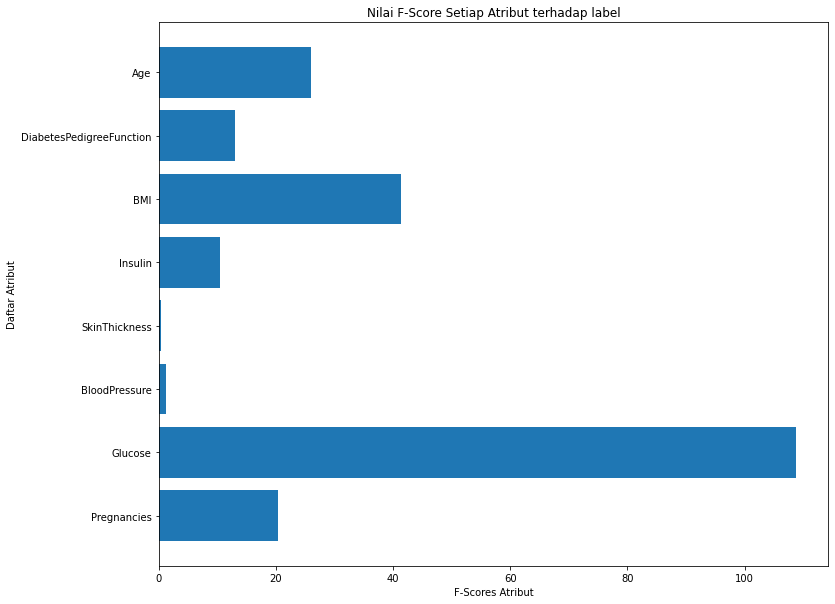

In [27]:
# instansiasi objek
anova_fs = SelectKBest(score_func=f_classif, k='all')
# anova fit into data training
anova_fs = anova_fs.fit(X_train,y_train)

# Plotting features important
plt.figure(figsize=(12,10))
plt.barh(list(anova_fs.feature_names_in_),anova_fs.scores_)
plt.ylabel('Daftar Atribut')
plt.xlabel('F-Scores Atribut')
plt.title('Nilai F-Score Setiap Atribut terhadap label')
plt.show()

Ambil 4 fitur dengan score tertinggi, yaitu **Glucose, BMI, Pregnancies, dan Age**. Sisanya akan dibuang

### Buat objek ANOVA Final

In [28]:
# instansiasi objek anova_final
anova_final_fs_ = SelectKBest(score_func=f_classif, k=4)

# anova fit into data training
anova_final_fs_ = anova_final_fs_.fit(X_train,y_train)

# transform into train and test data
X_train_fs = anova_final_fs_.transform(X_train)
X_test_fs = anova_final_fs_.transform(X_test)

In [29]:
X_train_fs

array([[  3. , 102. ,  30.8,  26. ],
       [  0. , 129. ,  67.1,  26. ],
       [  6. , 147. ,  29.5,  50. ],
       ...,
       [  5. , 155. ,  38.7,  34. ],
       [  7. , 150. ,  34.7,  42. ],
       [  0. , 188. ,  32. ,  22. ]])

### Buat dataframe hasil feature selection dan tentukan best features

In [30]:
mask = anova_final_fs_.get_support() #list of booleans
best_features_anova_ = [] # The list of your K best features

for bool, feature in zip(mask, X_train.columns):
    if bool:
        best_features_anova_.append(feature)

In [31]:
X_train = pd.DataFrame(data=X_train_fs,columns=best_features_anova_)
X_test = pd.DataFrame(data=X_test_fs,columns=best_features_anova_)

### Simpan hasil feature selection into models

In [32]:
models['feature_selection']={
    'method':'ANOVA F-Score',
    'scaler': anova_final_fs_,
    'best_k':4,
    'best_features_':best_features_anova_
}

## Imputasi Invalid Values
***
Nilai median akan digunakan untuk mengimputasi nilai invalid dari setiap atributnya

In [33]:
# ganti nilai invalid dengan np.nan
for invalid_col in best_features_anova_:
    X_train[invalid_col].replace({0:np.nan}, inplace=True)
    X_test[invalid_col].replace({0:np.nan}, inplace=True)
    

# imputasi nan dengan median
numerical_imputer = SimpleImputer(strategy='median')
numerical_imputer.fit(X_train[best_features_anova_])

X_train[best_features_anova_] = numerical_imputer.transform(X_train[best_features_anova_])
X_test[best_features_anova_] = numerical_imputer.transform(X_test[best_features_anova_]) 

# save numerical imputer into models
models['imputer']={
    'numerical':numerical_imputer
}

## Outliers Handling

### Function untuk menentukan batas IQR Outliers

In [34]:
def fences(df, variable_name):    
    q1 = df[variable_name].quantile(0.25)
    q3 = df[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 1.5*iqr
    outer_fence_lower = q1-outer_fence
    outer_fence_upper = q3+outer_fence
    return (outer_fence_lower, outer_fence_upper)

In [35]:
feature_fence_dict_ = dict()

for feature in X_train.columns.values:
    feature_fence_dict_[feature] = fences(X_train,feature)

In [36]:
feature_fence_dict_

{'Pregnancies': (-5.5, 14.5),
 'Glucose': (35.875, 214.875),
 'BMI': (17.124999999999996, 48.525000000000006),
 'Age': (-3.0, 69.0)}

**ANALISIS**<br>
Outer fence lower yang dibawah 0 tidak memiliki artinya, sehingga atribut yang demikian akan di winsorized pada right tail saja. Sisanya akan di winsorize pada kedua sisi. <br>
Right tail winsorized: <br>
1. Pregnancies
2. Age

### Winsorizing

In [37]:
X_train_win = X_train.copy(deep=True)

In [38]:
right_tails_columns = ['Pregnancies','Age']
all_tails_columns = [col for col in X_train.columns.values if col not in right_tails_columns]

# remove atribut 'Glucose' karna sudah tidak ada outliers
all_tails_columns.remove('Glucose')

# save columns into models
models['columns'].append(('right_tail_columns',right_tails_columns))
models['columns'].append(('all_tails_columns',all_tails_columns))

In [39]:
# winsorize k=5% on right tails
for right_col in right_tails_columns:
    X_train_win[right_col] = winsorize(X_train_win[right_col], limits=(0, 0.05))
    
# winsorize k=5% on all tails
for all_col in all_tails_columns:
    X_train_win[all_col] = winsorize(X_train_win[all_col], limits=(0.05, 0.05))

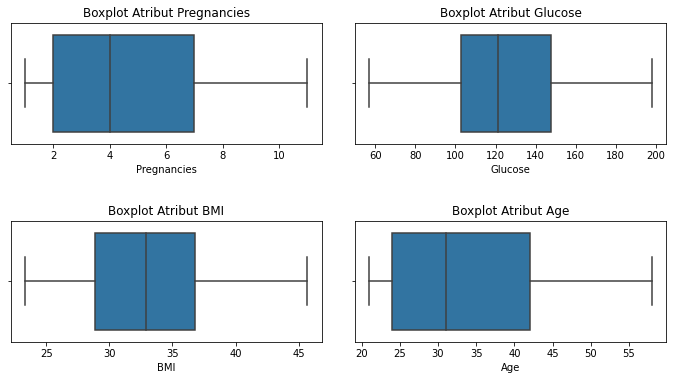

In [40]:
fig = plt.figure( figsize=(10,22))
axs= []
plot_number = 1

for col in X_train_win.columns.values:
    axs.append(fig.add_subplot(n_rows,n_cols,plot_number))
    sns.boxplot(x=X_train_win[col], ax=axs[plot_number-1])
    axs[plot_number-1].set_title('Boxplot Atribut '+col)
    
    plot_number+=1

fig.tight_layout(pad=3)

Setelah di winsorize, data train tidak ada outliers

In [41]:
X_train = X_train_win.copy(deep=True)

## Scaling

### Scaling with anova feature selection

In [42]:
# instansiasi objek scaler
standard_scaler = StandardScaler()

# fit into training data
standard_scaler.fit(X_train)

# transform into train and tes
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

### Save normalize scaler

In [43]:
models['standard_scaler']={
    'scaler':standard_scaler,
    'method':'Standard Scaler'
}

## Dimensionality Reduction

### Find best component

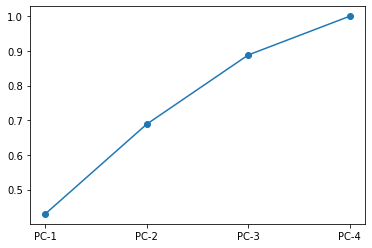

In [44]:
pca_ = PCA()

# fit into train
pca_.fit(X_train)

plt.plot(np.cumsum(pca_.explained_variance_ratio_), marker='o')
plt.xticks(ticks=range(0,len(best_features_anova_)), labels=['PC-'+str(i+1) for i in range(0,len(best_features_anova_))])
plt.show()

In [45]:
print(np.cumsum(pca_.explained_variance_ratio_))

[0.43004319 0.68885903 0.88828115 1.        ]


Dengan menggunakan 2 principal component sudah cukup menjelaskan +- 70% informasi dari data

### Create PCA Scaler for n best component

In [46]:
def find_best_pc(pc_):
    threshold_cumsum = 0.70
    best_principal_component = 0
    for pc_ke,cumsum in enumerate(np.cumsum(pca_.explained_variance_ratio_)):
        if cumsum >=threshold_cumsum:
            # tambah 1 karna start index dari 0
            best_principal_component=pc_ke+1
            break
    return best_principal_component

In [47]:
best_principal_component = find_best_pc(pca_)
pca_scaler_ = PCA(n_components=best_principal_component)

# fit into train 
pca_scaler_.fit(X_train)

# transform into train and test
X_train_pca = pca_scaler_.transform(X_train)
X_test_pca = pca_scaler_.transform(X_test)

### Simpan PCA Scaler

In [48]:
models['dimensionality_reduction']={
    'method':'PCA',
    'best_k':best_principal_component,
    'scaler':pca_scaler_,
}

## Simpan data akhir hasil preprocessing

In [49]:
models['data']={
    'after_preprocessing':{
        'X_train':X_train_pca,
        'y_train':y_train,
        'X_test':X_test_pca,
        'y_test':y_test,
    }
}

# Modelling

In [50]:
def perform_model(models,X_train,y_train,kfold, scoring='accuracy'):
    """
        Deskripsi Function:
        - Fungsi ini digunakan untuk melakukan model cross-validation dengan data latih yang ada. Setiap model
        akan divalidasi dengan ukuran skor (scoring) yang telah ditetapkan, semisal (akurasi, recall, etc).
        
        Function parameters:
        - models: list of tuples dari model yang ingin dituning (LogisticRegression, SVM, etc)
        - X_train: dataframe atau np.array dari atribut data latih yang sudah dipreprocessing
        - y_train: dataframe atau np.array dari target data latih yang sudah dipreprocessing
        - kfold: objek hasil instansiasi kelas KFold 
        - scoring: metode untuk memngukur performa model (accuracy, recall, precision, etc)
        
        Function returns:
        - cv_results: List dari hasil cross validation setiap model yang sudah dituning
        - model_names: List dari nama setiap model (string)
        - print_msg: List berupa pesan untuk menampilkan model dengan hasil performanya pada data validasi
    """
    cv_results = [] #menampung hasil crossvalidation setiap model
    model_names = [] #menampung nama model
    print_msg = [] #menampung pesan yang akan ditampilkan
    
    
    for model_name, model in models:
        #cross validation result
        cv_result = cross_val_score(model,X_train,y_train, cv=kfold,scoring=scoring)

        #append into list
        cv_results.append(cv_result)
        model_names.append(model_name)

        #print result
        msg_result = "{}: mean {} = {}  std {} = {}".format(model_name,scoring,cv_result.mean(),scoring,cv_result.std())
        print_msg.append(msg_result)
    
    return cv_results,model_names,print_msg

def tuning_hyperparameters_model(model, kfold, params_grid, X_train,y_train,scoring="accuracy"):
    """
        Function Description: Fungsi untuk melakukan tuning hyperparameter model
    """
    # instansiasi objek
    grid_params_model = GridSearchCV(
        estimator= model,
        param_grid=params_grid,
        scoring=scoring,
        cv = kfold
    )
    # result
    grid_result = grid_params_model.fit(X_train,y_train)
    return grid_result

## Cross Validation Model with Accuracy Score

### Fungsi menampillkan output

In [51]:
def print_classification_report(y_train,y_test,y_pred_train,y_pred_test,model_name):
    # print score
    print("Training Accuracy score {}  = {}%".format(model_name,(metrics.accuracy_score(y_train,y_pred_train))*100))
    print("Training Recall score {}  = {}%".format(model_name,(metrics.recall_score(y_train,y_pred_train))*100))
    print("Testing Accuracy score {}  = {}%".format(model_name,(metrics.accuracy_score(y_test,y_pred_test))*100))
    print("Testing Recall score {}  = {}%".format(model_name,(metrics.recall_score(y_test,y_pred_test))*100))
    print("="*100)
    print("Confusion Matrix of {} on Training".format(model_name))
    print(metrics.confusion_matrix(y_train,y_pred_train))
    print("Confusion Matrix of {} on Testing".format(model_name))
    print(metrics.confusion_matrix(y_test,y_pred_test))
    print("="*100)
    # hasil klasifikasi
    print("Detailed Classification Report of {} on Training".format(model_name))
    print(metrics.classification_report(y_train,y_pred_train))
    print("Detailed Classification Report of {} on Testing".format(model_name))
    print(metrics.classification_report(y_test,y_pred_test))

### Inisialisasi

In [52]:
# Inisialisasi fold dan scoring yang digunakan
num_fold = 10
scoring_accuracy ='accuracy'
scoring_recall = 'recall'

In [53]:
# buat list dari seluruh model yang digunakan
classifier_models = []

# append model
classifier_models.append(('Support Vector Machine', SVC()))
classifier_models.append(('Logistic Regression', LogisticRegression()))
classifier_models.append(('K-Nearest Neighbor', KNeighborsClassifier()))
classifier_models.append(('Decision Tree', DecisionTreeClassifier()))
classifier_models.append(('Random Forest', RandomForestClassifier()))
classifier_models.append(('Naive Bayes', GaussianNB()))

#k-fold cross validation initialization object
kfold = KFold(n_splits=num_fold, random_state=42, shuffle=True)

### Proses K-Fold Cross-Validation

In [54]:
cv_results_accuracy, model_names, print_msg_accuracy = perform_model(
    models=classifier_models,
    X_train=X_train_pca,
    y_train=y_train,
    kfold=kfold,
    scoring=scoring_accuracy
)

In [55]:
# cetak hasil rata-rata akurasi setiap model
for msg in print_msg_accuracy:
    print(msg)

Support Vector Machine: mean accuracy = 0.7514224751066856  std accuracy = 0.0783060918282201
Logistic Regression: mean accuracy = 0.7379800853485065  std accuracy = 0.07450579165848653
K-Nearest Neighbor: mean accuracy = 0.7595305832147938  std accuracy = 0.043455916070684136
Decision Tree: mean accuracy = 0.7143669985775248  std accuracy = 0.06971303642837165
Random Forest: mean accuracy = 0.7649359886201992  std accuracy = 0.08415972118006085
Naive Bayes: mean accuracy = 0.727524893314367  std accuracy = 0.09068513092111975


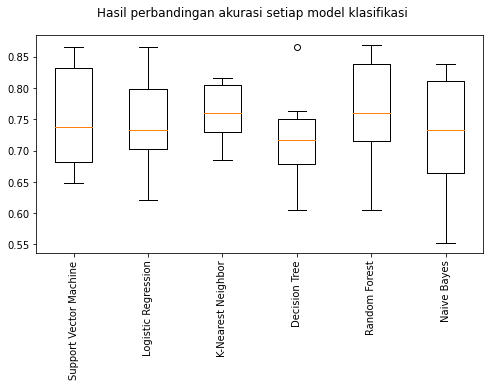

In [56]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Hasil perbandingan akurasi setiap model klasifikasi')
ax = fig.add_subplot(111)

plt.boxplot(cv_results_accuracy)
ax.set_xticklabels(model_names, rotation=90)
fig.set_size_inches(8,4)
plt.show()

## SVM

In [57]:
# inisialisasi model
svm_balanced = SVC()
# fit model into training data
svm_balanced.fit(X_train_pca,y_train)
# get y prediction
y_pred_train_svm_balanced = svm_balanced.predict(X_train_pca)
y_pred_test_svm_balanced = svm_balanced.predict(X_test_pca)

In [58]:
print_classification_report(y_train,y_test,y_pred_train_svm_balanced,y_pred_test_svm_balanced,'SVM')

Training Accuracy score SVM  = 78.87700534759358%
Training Recall score SVM  = 82.88770053475936%
Testing Accuracy score SVM  = 75.75757575757575%
Testing Recall score SVM  = 79.01234567901234%
Confusion Matrix of SVM on Training
[[140  47]
 [ 32 155]]
Confusion Matrix of SVM on Testing
[[111  39]
 [ 17  64]]
Detailed Classification Report of SVM on Training
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       187
           1       0.77      0.83      0.80       187

    accuracy                           0.79       374
   macro avg       0.79      0.79      0.79       374
weighted avg       0.79      0.79      0.79       374

Detailed Classification Report of SVM on Testing
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       150
           1       0.62      0.79      0.70        81

    accuracy                           0.76       231
   macro avg       0.74      0.77      0.75  

### Tuning Hyperparameter SVM

In [59]:
grid_results_svm_ = tuning_hyperparameters_model(
    model=SVC(probability=True), 
    kfold=kfold, 
    params_grid={
        'C':[0.01,0.1,1],
        'kernel' : ['linear', 'poly', 'rbf', 'sigmoid',],
        'gamma':[0.01,0.1,1],
    },
    X_train = X_train_pca,
    y_train = y_train
)

In [60]:
# Cetak hyperparameter yang memberikan hasil terbaik
print('Best SVM Hyperparameter: {}'.format(grid_results_svm_.best_params_))
print('Best SVM Recall Score: {}'.format(grid_results_svm_.best_score_))

Best SVM Hyperparameter: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best SVM Recall Score: 0.7780938833570412


### Train Test Model dengan hyperparameter optimal 

In [61]:
svm_final_model_ = SVC(kernel=grid_results_svm_.best_params_['kernel'], gamma=grid_results_svm_.best_params_['gamma'],C=grid_results_svm_.best_params_['C'])

# fit into training
svm_final_model_.fit(X_train_pca,y_train)

# predict
y_pred_train_svm_final_ = svm_final_model_.predict(X_train_pca)
y_pred_test_svm_final_ = svm_final_model_.predict(X_test_pca)

print_classification_report(y_train=y_train,y_test=y_test,y_pred_train=y_pred_train_svm_final_,y_pred_test=y_pred_test_svm_final_,model_name='SVM')

Training Accuracy score SVM  = 82.35294117647058%
Training Recall score SVM  = 87.70053475935828%
Testing Accuracy score SVM  = 77.05627705627705%
Testing Recall score SVM  = 85.18518518518519%
Confusion Matrix of SVM on Training
[[144  43]
 [ 23 164]]
Confusion Matrix of SVM on Testing
[[109  41]
 [ 12  69]]
Detailed Classification Report of SVM on Training
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       187
           1       0.79      0.88      0.83       187

    accuracy                           0.82       374
   macro avg       0.83      0.82      0.82       374
weighted avg       0.83      0.82      0.82       374

Detailed Classification Report of SVM on Testing
              precision    recall  f1-score   support

           0       0.90      0.73      0.80       150
           1       0.63      0.85      0.72        81

    accuracy                           0.77       231
   macro avg       0.76      0.79      0.76  

## KNN

### Tuning Hyperparameter KNN

In [62]:
grid_results_knn_ = tuning_hyperparameters_model(
    model=KNeighborsClassifier(), 
    kfold=kfold, 
    params_grid={
        'n_neighbors':[i for i in range(1,25,2)],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p':[1,2,3],
    },
    X_train = X_train_pca,
    y_train = y_train
)

In [63]:
# Cetak hyperparameter yang memberikan hasil terbaik
print('Best SVM Hyperparameter: {}'.format(grid_results_knn_.best_params_))
print('Best SVM Recall Score: {}'.format(grid_results_knn_.best_score_))

Best SVM Hyperparameter: {'algorithm': 'auto', 'n_neighbors': 21, 'p': 3}
Best SVM Recall Score: 0.7754623044096729


### Train Test Model dengan Hyperparameter Optimal

In [64]:
knn_final_model = KNeighborsClassifier(
    n_neighbors=grid_results_knn_.best_params_['n_neighbors'],
    algorithm=grid_results_knn_.best_params_['algorithm'],
    p=grid_results_knn_.best_params_['p'],
)

# fit into training
knn_final_model.fit(X_train_pca,y_train)

# predict
y_pred_train_knn_final_ = knn_final_model.predict(X_train_pca)
y_pred_test_knn_final_ = knn_final_model.predict(X_test_pca)

print_classification_report(y_train=y_train,y_test=y_test,y_pred_train=y_pred_train_knn_final_,y_pred_test=y_pred_test_knn_final_,model_name='SVM')

Training Accuracy score SVM  = 78.87700534759358%
Training Recall score SVM  = 83.42245989304813%
Testing Accuracy score SVM  = 77.05627705627705%
Testing Recall score SVM  = 87.65432098765432%
Confusion Matrix of SVM on Training
[[139  48]
 [ 31 156]]
Confusion Matrix of SVM on Testing
[[107  43]
 [ 10  71]]
Detailed Classification Report of SVM on Training
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       187
           1       0.76      0.83      0.80       187

    accuracy                           0.79       374
   macro avg       0.79      0.79      0.79       374
weighted avg       0.79      0.79      0.79       374

Detailed Classification Report of SVM on Testing
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       150
           1       0.62      0.88      0.73        81

    accuracy                           0.77       231
   macro avg       0.77      0.79      0.76  

# Save Models

In [65]:
# sementara simpan model KNN yang sudah dilatih
models['model_train']={
    'model':knn_final_model,
}
pickle.dump(models,open('models/models_trained.pkl','wb'))